In [133]:
import numpy as np
import pandas as pd

In [134]:
df = pd.read_csv('diamonds.csv', index_col=0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [135]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

^ No duplicates

In [136]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [137]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

^ Cut, color and clarity are categorical

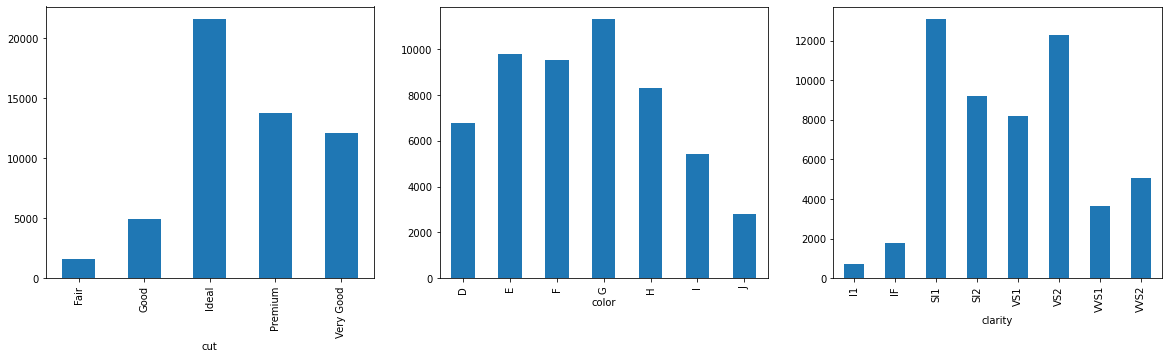

In [138]:
import matplotlib.pyplot as plt

columns = ['cut', 'color', 'clarity']

fig, subPlot = plt.subplots(nrows=1, ncols=len(columns), figsize=(20,5))

for colName, plotNumber in zip(columns, range(len(columns))):
    df.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>]], dtype=object)

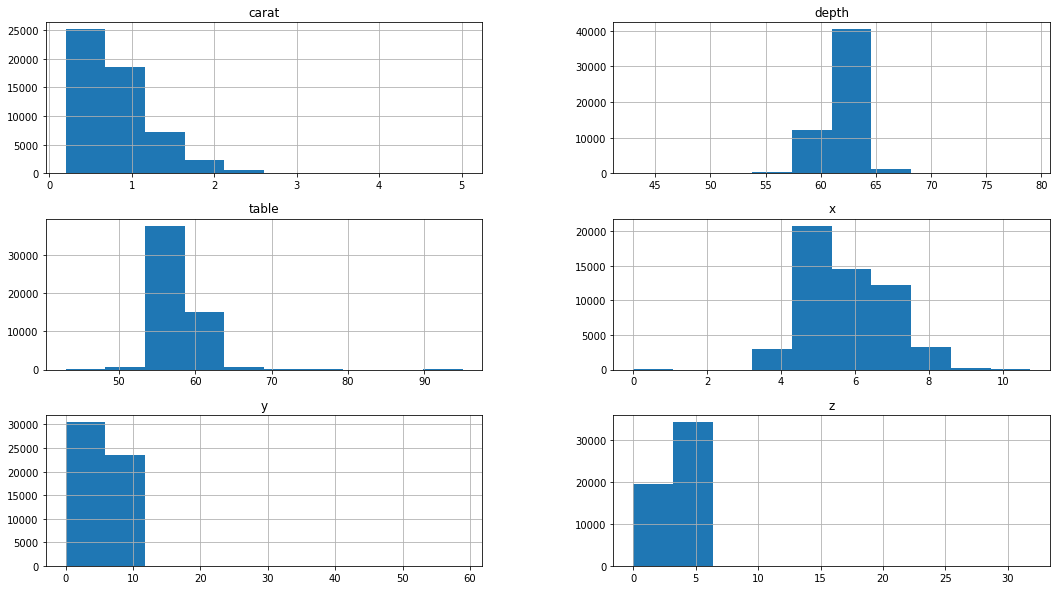

In [139]:
df.hist(['carat', 'depth', 'table', 'x','y','z'], figsize=(18,10))

In [140]:
df['x'][df['x'] > 2].sort_values(ascending=True)

31597     3.73
31601     3.73
31599     3.74
31600     3.76
31602     3.77
         ...  
26445    10.01
26000    10.02
25999    10.14
27631    10.23
27416    10.74
Name: x, Length: 53932, dtype: float64

In [141]:
df['x'][df['x'] < 3.73] = 3.73

/tmp/ipykernel_7252/2332219045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'][df['x'] < 3.73] = 3.73


In [142]:
df['y'][df['y'] < 20].sort_values(ascending=False)

27416    10.54
27631    10.16
25999    10.10
26445     9.94
26000     9.94
         ...  
15952     0.00
24521     0.00
49557     0.00
49558     0.00
27430     0.00
Name: y, Length: 53938, dtype: float64

In [143]:
df['y'][df['y'] > 20] = 10.54

/tmp/ipykernel_7252/933910818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][df['y'] > 20] = 10.54


In [144]:
df['z'][df['z'] < 10].sort_values(ascending=False)

24068    8.06
27416    6.98
27631    6.72
27131    6.43
23645    6.38
         ... 
5472     0.00
24395    0.00
13602    0.00
2315     0.00
49558    0.00
Name: z, Length: 53939, dtype: float64

In [145]:
df['z'][df['z'] > 8] = 6.98

/tmp/ipykernel_7252/83805326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z'][df['z'] > 8] = 6.98


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

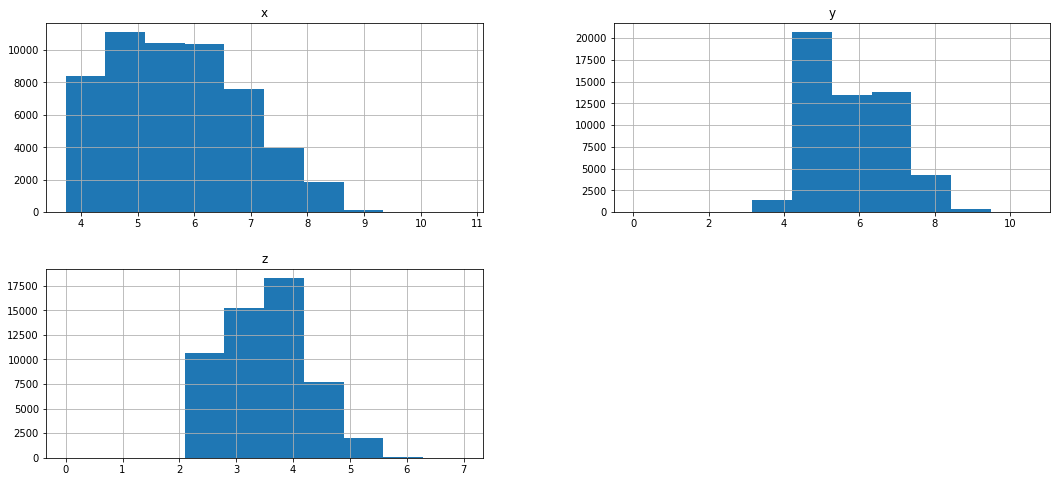

In [146]:
df.hist(['x', 'y', 'z'], figsize=(18,8))

In [147]:
df['y'][df['y'] > 2].sort_values(ascending=True)

31601     3.68
31597     3.71
31599     3.71
31602     3.72
31600     3.73
         ...  
25999    10.10
27631    10.16
24068    10.54
49190    10.54
27416    10.54
Name: y, Length: 53933, dtype: float64

In [148]:
df['y'][df['y'] < 2] = 3.68

/tmp/ipykernel_7252/19727304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][df['y'] < 2] = 3.68


In [149]:
df['z'][df['z'] > 2].sort_values(ascending=True)

39247    2.06
31593    2.24
47139    2.25
31592    2.26
15       2.27
         ... 
27131    6.43
27631    6.72
24068    6.98
48411    6.98
27416    6.98
Name: z, Length: 53917, dtype: float64

In [150]:
df['z'][df['z'] < 2] = 2.06

/tmp/ipykernel_7252/1505408881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z'][df['z'] < 2] = 2.06


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

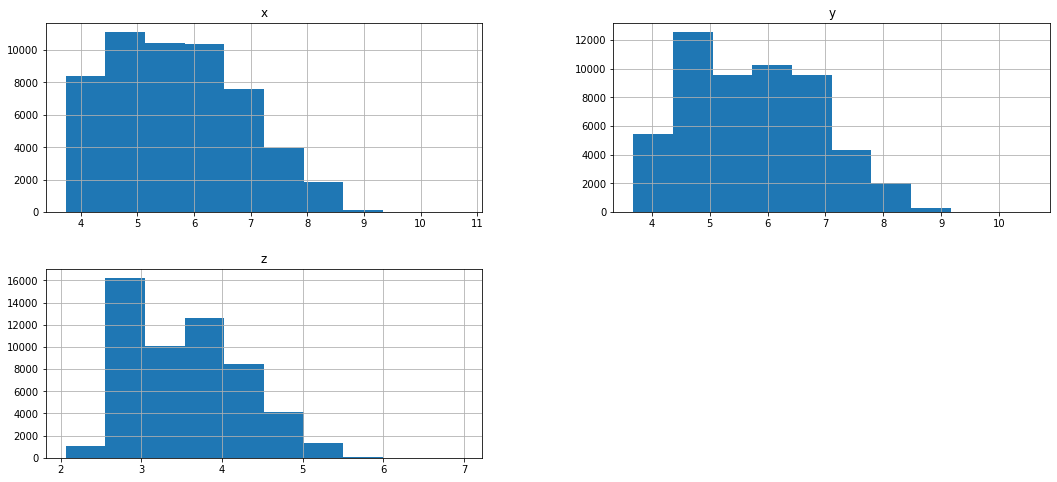

In [151]:
df.hist(['x', 'y', 'z'], figsize=(18,8))

In [152]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [153]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [154]:
cont_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']
cat_columns = ['cut', 'color', 'clarity']

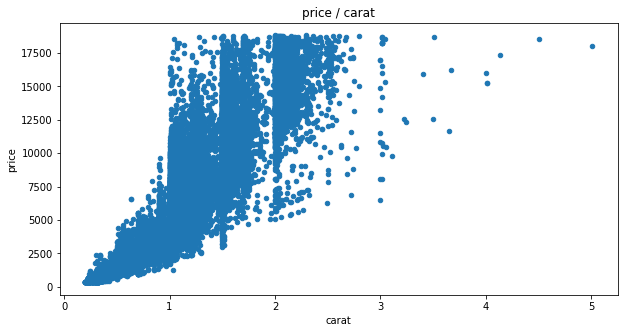

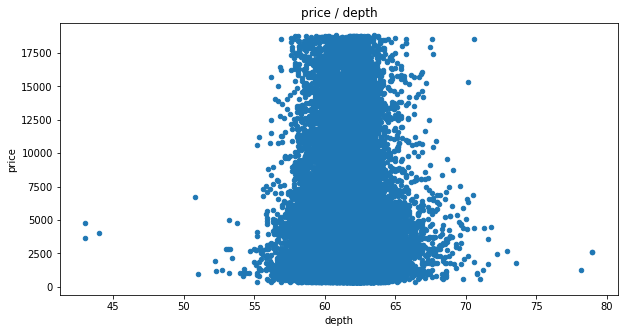

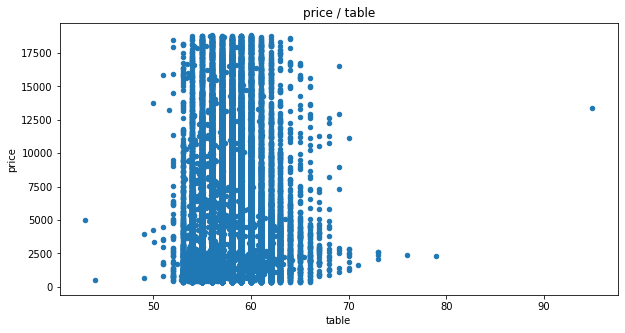

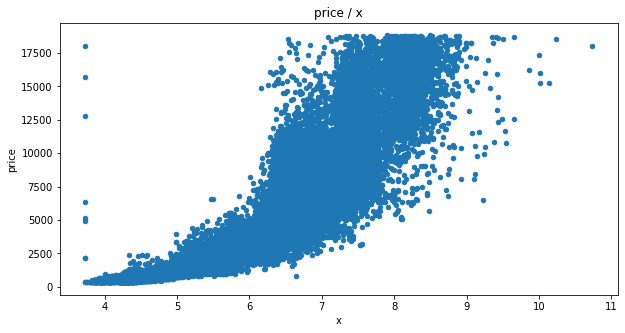

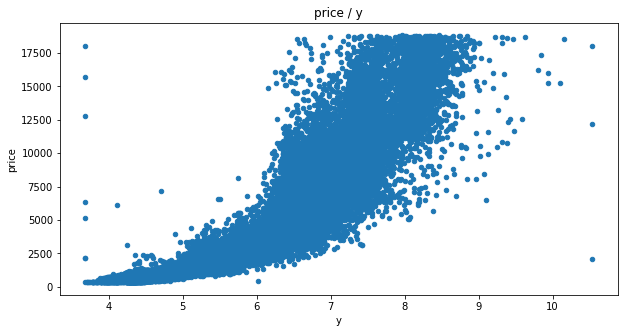

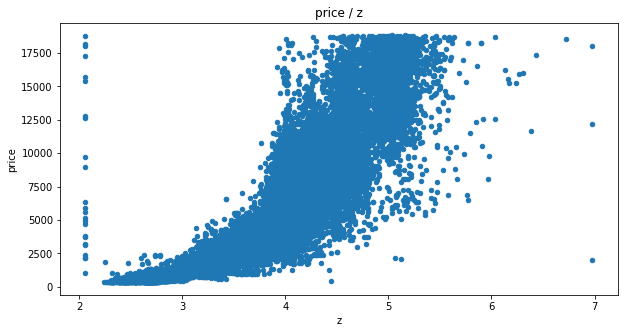

In [155]:
for col in cont_columns:
    df.plot.scatter(x=col, y='price', figsize=(10,5), title='price / ' + col)

In [156]:
df['z'].sort_values(ascending=True)

11183    2.06
24395    2.06
27113    2.06
27740    2.06
20695    2.06
         ... 
27131    6.43
27631    6.72
24068    6.98
27416    6.98
48411    6.98
Name: z, Length: 53940, dtype: float64

In [157]:
z_filter = (df['z'] > 2.06) & (df['z'] < 6.5)
df = df[z_filter]

In [158]:
df['y'].sort_values(ascending=True)[:8]

31601    3.68
31597    3.71
31599    3.71
31602    3.72
31600    3.73
15       3.75
31598    3.77
31592    3.77
Name: y, dtype: float64

In [159]:
df['y'].sort_values(ascending=False)[:8]

49190    10.54
25999    10.10
26445     9.94
26000     9.94
27131     9.85
26535     9.81
27680     9.63
24329     9.59
Name: y, dtype: float64

In [160]:
y_filter = (df['y'] > 3.75) & (df['y'] < 10.10)
df = df[y_filter]

In [161]:
df['x'].sort_values(ascending=True)[:10]

31592    3.79
31598    3.81
31593    3.81
31594    3.81
38277    3.82
38274    3.82
37       3.83
23370    3.83
36946    3.83
31595    3.84
Name: x, dtype: float64

In [162]:
df['x'].sort_values(ascending=False)[:10]

26000    10.02
26445    10.01
27131    10.00
26535     9.86
27680     9.66
24329     9.65
22742     9.54
23645     9.53
27639     9.51
24298     9.49
Name: x, dtype: float64

In [163]:
x_filter = (df['x'] > 3.83) & (df['x'] < 10.02)
df = df[x_filter]

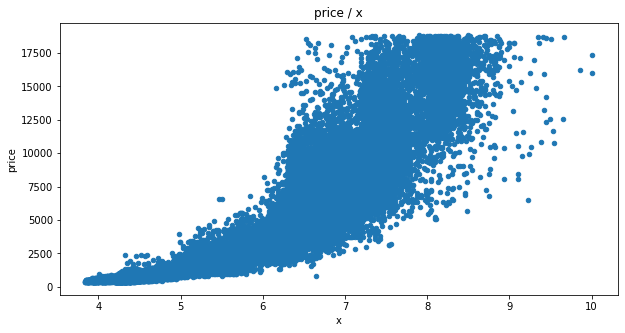

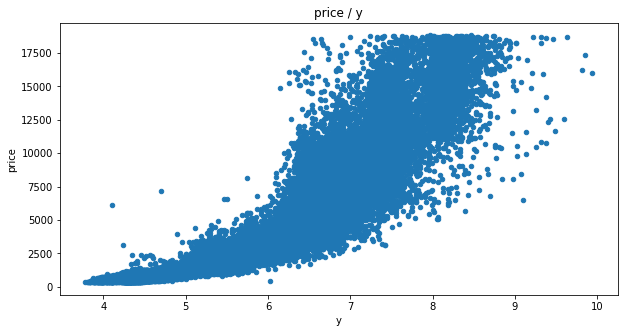

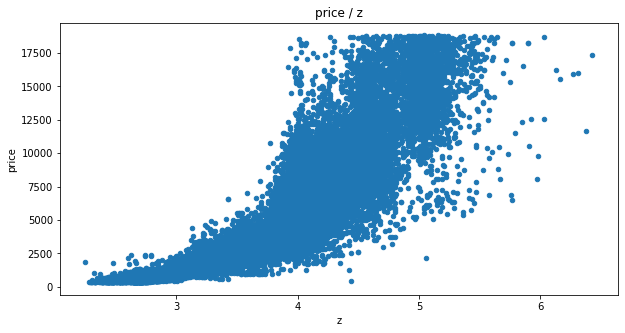

In [164]:
for col in ['x', 'y', 'z']:
    df.plot.scatter(x=col, y='price', figsize=(10,5), title='price / ' + col)

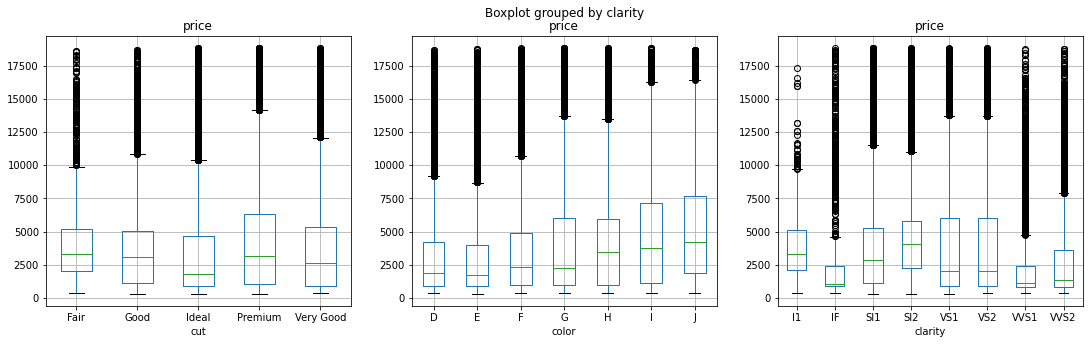

In [165]:
fig, canvas = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(18,5))

for col, i in zip(cat_columns, range(len(cat_columns))):
    df.boxplot(column='price', by=col, figsize=(5,5), vert=True, ax=canvas[i])

In [166]:
learning_columns = ['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']

ml_data = df[learning_columns]
ml_data.head()

,carat,x,y,z,cut,color,clarity
1,0.23,3.95,3.98,2.43,Ideal,E,SI2
2,0.21,3.89,3.84,2.31,Premium,E,SI1
3,0.23,4.05,4.07,2.31,Good,E,VS1
4,0.29,4.20,4.23,2.63,Premium,I,VS2
5,0.31,4.34,4.35,2.75,Good,J,SI2


In [167]:
ml_data.to_pickle('ml_data.pkl')

In [168]:
ml_data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [169]:
ml_data['cut'].replace({
    'Good': 1,
    'Very Good': 2,
    'Fair': 3,
    'Ideal': 4,
    'Premium': 5,
}, inplace=True)

/tmp/ipykernel_7252/4171452652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data['cut'].replace({


In [170]:
ml_data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [172]:
ml_data['color'].replace({
    'J': 1,
    'I': 2,
    'H': 3,
    'G': 4,
    'F': 5,
    'E': 6,
    'D': 7,
}, inplace=True)

/tmp/ipykernel_7252/3192652470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data['color'].replace({


In [173]:
ml_data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [174]:
ml_data['clarity'].replace({
    'I1': 1,
    'SI1': 2,
    'SI2': 3,
    'VS1': 4,
    'VS2': 5,
    'VVS1': 6,
    'VVS2': 7,
    'IF': 8
}, inplace=True)

/tmp/ipykernel_7252/1538225965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data['clarity'].replace({


In [177]:
ml_data['price'] = df['price']
ml_data.head()

/tmp/ipykernel_7252/429184533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data['price'] = df['price']


,carat,x,y,z,cut,color,clarity,price
1,0.23,3.95,3.98,2.43,4,6,3,326
2,0.21,3.89,3.84,2.31,5,6,2,326
3,0.23,4.05,4.07,2.31,1,6,4,327
4,0.29,4.20,4.23,2.63,5,2,5,334
5,0.31,4.34,4.35,2.75,1,1,3,335


In [181]:
from sklearn.preprocessing import MinMaxScaler

targer_var = 'price'
predictors = ['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']

x = ml_data[predictors].values
predictor_scaler = MinMaxScaler()
scaler_fit = predictor_scaler.fit(x)
x = scaler_fit.transform(x)

y = ml_data[targer_var].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [185]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37725, 7)
(37725,)
(16169, 7)
(16169,)


In [189]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

print(reg_model)

l_reg = reg_model.fit(x_train, y_train)
prediction = l_reg.predict(x_test)

from sklearn import metrics

print('R2: ', metrics.r2_score(y_train, l_reg.predict(x_train)))

print('\n -- Accuracy --')

test_results = pd.DataFrame(data=x_test, columns=predictors)
test_results[targer_var] = y_test
test_results[('Predicted ' + targer_var)] = np.round(prediction)

print(test_results[[targer_var, 'Predicted ' + targer_var]].head())

test_results['APE'] = 100 * ((abs(
    test_results[targer_var]-test_results['Predicted ' + targer_var]))/test_results[targer_var])

accuracy = 100 - np.mean(test_results['APE'])
median_accuracy = 100 - np.median(test_results['APE'])

print('Mean Accuracy on test data:', accuracy)
print('Median Accuracy on test data:', median_accuracy)

def accuracy_score(orig, pred):
    return 100 - np.mean(100 * (np.abs(orig - pred) / orig))

from sklearn.metrics import make_scorer
scoring = make_scorer(accuracy_score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

accuracy_values = cross_val_score(reg_model, x, y, cv=10, scoring=scoring)
print('\n Accuracy for 10-fold cross validation\n', accuracy_values)
print('\n Average accuracy: ', round(accuracy_values.mean(), 2))

LinearRegression()
R2:  0.8971422478621567

 -- Accuracy --
   price  Predicted price
0    789            692.0
1  18607          14849.0
2   1311           1367.0
3    631            458.0
4  15072          13146.0
Mean Accuracy on test data: 59.75516077460173
Median Accuracy on test data: 77.26718178121187

 Accuracy for 10-fold cross validation
 [61.78308226 69.68654302 78.8231203  75.84717938 75.4549067  16.69276894
 29.13806995 41.41505491 56.01893652 65.42520946]

 Average accuracy:  57.03


In [193]:
from sklearn.neighbors import KNeighborsRegressor
reg_model = KNeighborsRegressor(n_neighbors=4)

print(reg_model)

knn = reg_model.fit(x_train, y_train)
prediction = knn.predict(x_test)

from sklearn import metrics

print('R2: ', metrics.r2_score(y_train, knn.predict(x_train)))

print('\n -- Accuracy --')

test_results = pd.DataFrame(data=x_test, columns=predictors)
test_results[targer_var] = y_test
test_results[('Predicted ' + targer_var)] = np.round(prediction)

print(test_results[[targer_var, 'Predicted ' + targer_var]].head())

test_results['APE'] = 100 * ((abs(
    test_results[targer_var]-test_results['Predicted ' + targer_var]))/test_results[targer_var])

accuracy = 100 - np.mean(test_results['APE'])
median_accuracy = 100 - np.median(test_results['APE'])

print('Mean Accuracy on test data:', accuracy)
print('Median Accuracy on test data:', median_accuracy)

def accuracy_score(orig, pred):
    return 100 - np.mean(100 * (np.abs(orig - pred) / orig))

from sklearn.metrics import make_scorer
scoring = make_scorer(accuracy_score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

accuracy_values = cross_val_score(reg_model, x, y, cv=10, scoring=scoring)
print('\n Accuracy for 10-fold cross validation\n', accuracy_values)
print('\n Average accuracy: ', round(accuracy_values.mean(), 2))

KNeighborsRegressor(n_neighbors=4)
R2:  0.9855396860466552

 -- Accuracy --
   price  Predicted price
0    789            786.0
1  18607          17921.0
2   1311           1141.0
3    631            562.0
4  15072          14538.0
Mean Accuracy on test data: 92.09115629003561
Median Accuracy on test data: 94.5

 Accuracy for 10-fold cross validation
 [84.11172511 86.95654381 86.24597262 83.79178552 81.40124474 82.51622029
 83.85522227 83.0122983  83.68681007 84.5478075 ]

 Average accuracy:  84.01
